In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import math
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [183]:
HRV = pd.read_csv('/Users/aguetat/Desktop/NEW_F013C350104F.csv')
HRV.head(5)

,timestamp,HRV
0,1.11,0.00
1,1.94,0.83
2,2.81,0.87
3,3.47,0.66
4,4.44,0.97


In [184]:
np.random.seed(7)

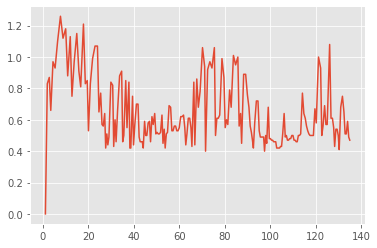

In [185]:
x = HRV[' timestamp']
y = HRV['HRV']
plt.plot(x, y)
plt.show()

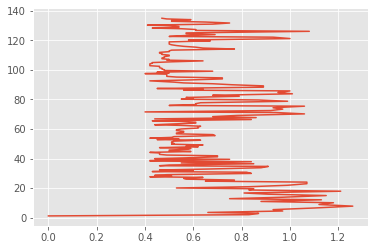

In [186]:
y = HRV[' timestamp']
x = HRV['HRV']
plt.plot(x, y)
plt.show()

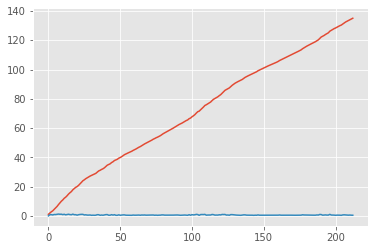

In [187]:
plt.plot(HRV)
plt.show()

In [188]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
HRV = pd.DataFrame(HRV)
print(HRV.dtypes)
HRV = scaler.fit_transform(HRV)

 timestamp    float64
HRV           float64
dtype: object


In [189]:
# split into train and test sets
HRV_train = int(len(HRV) * 0.67)
HRV_test = len(HRV) - HRV_train
train, test = HRV[0:HRV_train,:], HRV[HRV_train:len(HRV),:]
print(len(train), len(test))

142 71


In [190]:
# convert an array of values into a dataset matrix
def create_dataset(HRV, look_back=1):
    dataX, dataY = [], []
    for i in range(len(HRV)-look_back-1):
        a = HRV[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(HRV[i + look_back, 0])
        return np.array(dataX), np.array(dataY)

In [191]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print (trainY, testY)
print (trainX, testX)

[0.0061968] [0.71994923]
[[0.]] [[0.71696282]]


In [192]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print (trainX, testX)

[[[0.]]] [[[0.71696282]]]


In [193]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 3.8400e-05
Epoch 2/100
 - 0s - loss: 2.2688e-05
Epoch 3/100
 - 0s - loss: 1.2606e-05
Epoch 4/100
 - 0s - loss: 4.7335e-06
Epoch 5/100
 - 0s - loss: 9.1566e-07
Epoch 6/100
 - 0s - loss: 4.8404e-08
Epoch 7/100
 - 0s - loss: 1.4791e-06
Epoch 8/100
 - 0s - loss: 3.9142e-06
Epoch 9/100
 - 0s - loss: 6.1448e-06
Epoch 10/100
 - 0s - loss: 7.4108e-06
Epoch 11/100
 - 0s - loss: 7.4936e-06
Epoch 12/100
 - 0s - loss: 6.5749e-06
Epoch 13/100
 - 0s - loss: 5.0351e-06
Epoch 14/100
 - 0s - loss: 3.3037e-06
Epoch 15/100
 - 0s - loss: 1.7494e-06
Epoch 16/100
 - 0s - loss: 6.3142e-07
Epoch 17/100
 - 0s - loss: 6.9394e-08
Epoch 18/100
 - 0s - loss: 5.3366e-08
Epoch 19/100
 - 0s - loss: 4.4163e-07
Epoch 20/100
 - 0s - loss: 1.0290e-06
Epoch 21/100
 - 0s - loss: 1.5999e-06
Epoch 22/100
 - 0s - loss: 1.9837e-06
Epoch 23/100
 - 0s - loss: 2.0899e-06
Epoch 24/100
 - 0s - loss: 1.9159e-06
Epoch 25/100
 - 0s - loss: 1.5263e-06
Epoch 26/100
 - 0s - loss: 1.0407e-06
Epoch 27/100
 - 0s - 

In [194]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])
# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,2)

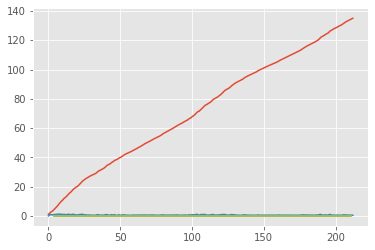

In [195]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(HRV)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(HRV)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(HRV)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(HRV))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()